##### PCA

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import mglearn

import matplotlib.pyplot as plt
plt.rcParams['font.family']='Maigun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [4]:
cancer = load_breast_cancer()

In [6]:
cancer.data.shape

(569, 30)

##### 유방암 데이터셋 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_16608\3743334434.py:19: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_16608\3743334434.py:19: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_16608\3743334434.py:19: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_16608\3743334434.py:19: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_16608\3743334434.py:19: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_16608\3743334434.py:19: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.tight_layout()
C:\

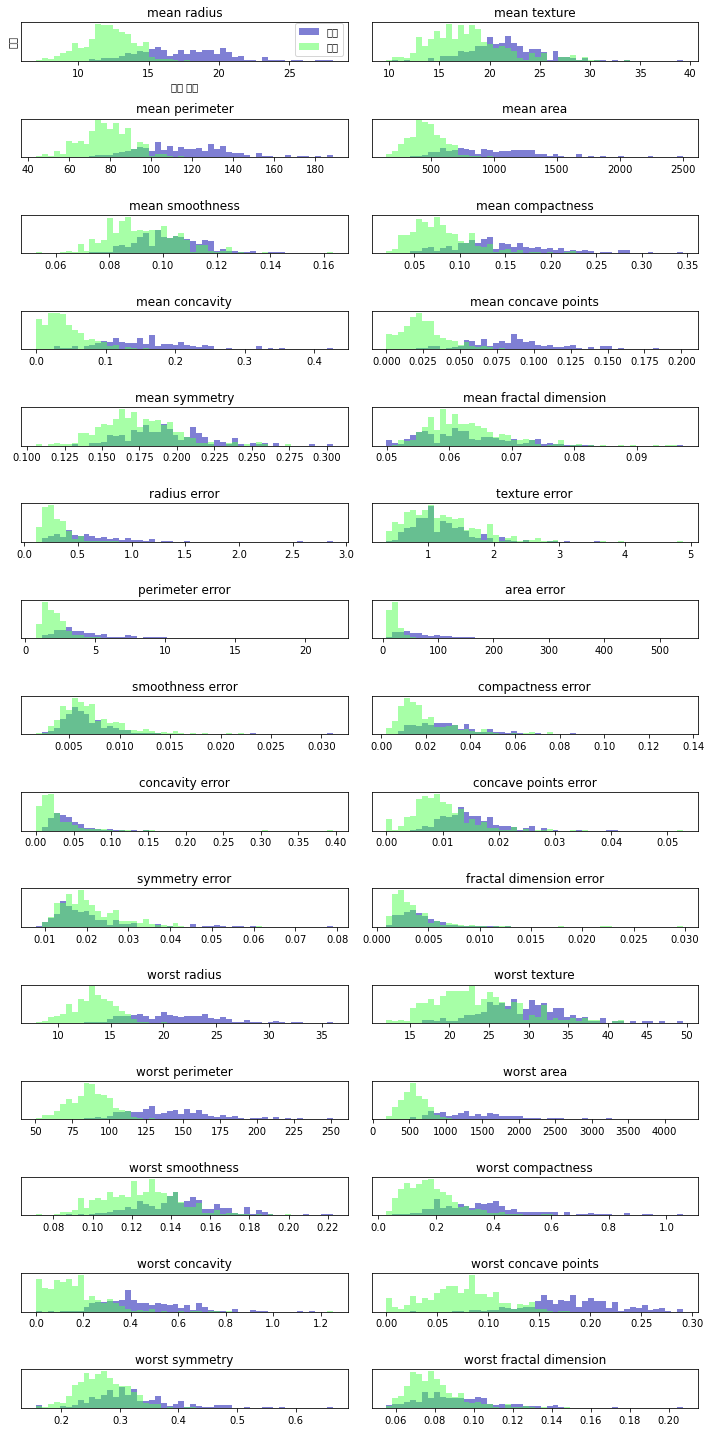

In [10]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
#악성
malignant = cancer.data[cancer.target==0]
#양성
benign = cancer.data[cancer.target==1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성', '양성'], loc='best')

fig.tight_layout()

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
x_scaled = scaler.transform(cancer.data)

In [12]:
from sklearn.decomposition import PCA
#30개의 데이터를 2개정도로 줄여보겠다?
#         주성분을 2개만 가지겠다. 
pca = PCA(n_components=2)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)

In [13]:
print('원본 데이터 형태: ', str(x_scaled.shape))
print('축소된 데이터 형태: ', str(x_pca.shape))

원본 데이터 형태:  (569, 30)
축소된 데이터 형태:  (569, 2)


c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\li

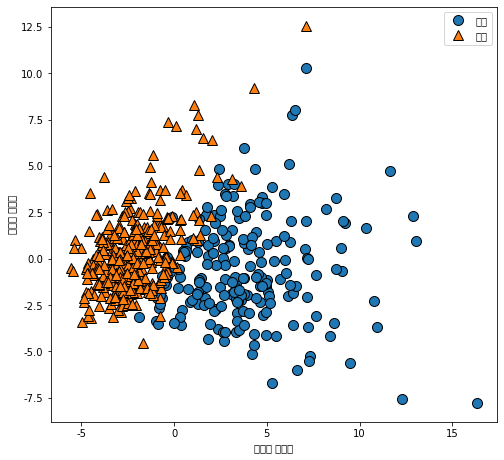

In [15]:
#클래스의 색깔로 구,분해서 두 개의 주성분 그래프 그려보기
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1], cancer.target)
plt.legend(['악성', '양성'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')
plt.show()